# NumPy: Ordenação de Arrays
Neste tópico, propomos o estudo do pacote `NumPy`, cujo objetivo é fornecer suporte para arrays multidimensionais, que possuem implementações prontas para operações básicas e funções de algebra linear extremamente úteis. Este pacote é a base de grande parte dos pacotes do Python que serão futuramente estudados. A implementação deste pacote é feita através de C, logo, ele é extremamente otimizado (devido a tipagém estática e uso de memória contigua), sendo ótimo para carregar, armazenear, e manipular dados dentro de memória no Python.

## Ordenação
Até então, pensamos nas ferramentas de criação, acesso e modificação de arrays. Uma tarefa importante para arrays é a ordenação dos valores, que pode ser uma tarefa computacionalmente intensiva. Por este motivo, há implementações otimizadas para os diferentes algoritmos de ordenação de estrutura de dados. 

### Ordenação otimizada
O Python possuí funções próprias de ordenação de arrays, mas como já mencionamos diversas vezes, aquelas implementadas pelo NumPy são muito mais otimizadas. A função `sort()` do NumPy possuí por default um desempenho $O(N Log N)$ através do quicksort, entretanto, há implementações para heapsort e mergesort. 

Pode se utilizar a função `sort()` para obter um cópia (sem alterar o array original) ordenada do array. O primeiro paramêtro deve ser o array a ser ordenado, o segundo (`axis`) é a dimensão em qual deve ser realizada a ordenação, o terceiro (`kind`) é o tipo de algoritmo de ordenação que deve ser utilizado (Possíveis valores: 'quicksort','mergesort','heapsort' e 'stable'), e o ultimo (`order`).  

In [1]:
import numpy as np
np.random.seed(0)
x = np.array([5,2,1,4,3])
np.sort(x)

array([1, 2, 3, 4, 5])

Para ordenar o próprio array, então, deve se utilizar o método sort, que funciona semelhante a função, sem o paramêtro com o array a ser ordenado. 

In [2]:
x = np.array([5,2,1,4,3])
x.sort()
print(x)

[1 2 3 4 5]


A função `argsort()` funciona da mesma maneira, entretanto o retorno é um array de indíces que quando utilizado para endereçar o array original, retorn o array ordenado.

In [3]:
x = np.array([5,2,1,4,3])
print("Array Original: ", x)
print("Indices para ordenar: ", np.argsort(x))
print("Array Ordenado", x[np.argsort(x)])

Array Original:  [5 2 1 4 3]
Indices para ordenar:  [2 1 4 3 0]
Array Ordenado [1 2 3 4 5]


### Ordenação Bidimensional
É possível utilizar as funções de ordenação para ordenar uma determinada linha ou coluna utilizando o NumPy. Quando um `axis` vazio é fornecido, então o array é transformado em um array unidimensional, e ocorre a ordenação.

In [4]:
x = np.array([4,3,2,1]).reshape((2,2))
print(x)
np.sort(x,axis=None)

[[4 3]
 [2 1]]


array([1, 2, 3, 4])

Por default, a ordenação ocorre permutando os elementos da mesma linha. 

In [5]:
x = np.array([4,3,2,1]).reshape((2,2))
print(x)
np.sort(x)

[[4 3]
 [2 1]]


array([[3, 4],
       [1, 2]])

É possível especificar o axis para realizar a ordenação. 

In [6]:
x = np.array([4,3,2,1]).reshape((2,2))
print(x)
np.sort(x,axis=0)

[[4 3]
 [2 1]]


array([[2, 1],
       [4, 3]])

## Particionamento
As vezes pode ser que não seja de interesse realiza uma ordenação completa, por exemplo, há alguns casos que pode se desejar os K menores valores dentro de um array. A função `partition()` do NumPy recebe um array e um valor K, gerando um novo array com os K menores valores a esquerda (em qualquer ordem), e os demais a direita (em qualquer ordem). 

In [7]:
x = np.array([6,5,4,3,2,1])
np.partition(x,3)

array([3, 1, 2, 4, 5, 6])

É possível realizar este particionamento ao longo de qualquer dimensão também. 

In [8]:
x = np.array([9,8,7,6,5,4,3,2,1]).reshape((3,3))
print(x)
print(np.partition(x,1,axis=0)) # Menor valor por coluna no topo
print(np.partition(x,1,axis=1)) # Menor valor por linha na esquerda
print(np.partition(x,3,axis=None)) # Menores 3 valores no array na esquerda

[[9 8 7]
 [6 5 4]
 [3 2 1]]
[[3 2 1]
 [6 5 4]
 [9 8 7]]
[[7 8 9]
 [4 5 6]
 [1 2 3]]
[2 1 3 4 5 8 6 7 9]


A função `argpartition()` realiza a mesma função, entretanto, retorna os indíces dos menores K elementos a esquerda/topo.

In [9]:
x = np.array([9,8,7,6,5,4,3,2,1]).reshape((3,3))
print(np.argpartition(x,1,axis=0)) # Posição do Menor por coluna no topo do array

[[2 2 2]
 [1 1 1]
 [0 0 0]]


## Exemplo: K-Nearest Neighbor
Abaixo, aplicamos o particionamento para encontrar os K valores mais próximos de cada ponto (par linha coluna). Primeiro criamos um array 10x2, preenchido com valores aleatórios.

In [10]:
x = np.random.rand(10,2)

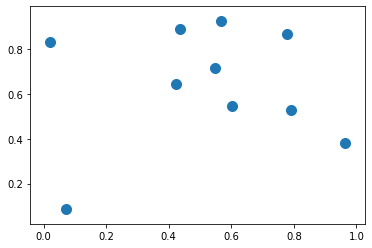

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], s=100);

Em seguida, podemos calcular a distância entre cada par de pontos.

In [12]:
dif_dist = x[:,np.newaxis,:] - x[np.newaxis,:,:] # Gera uma matriz para cada coordenada, com as distancias ate as outras coordenadas
dif_dist_quad = dif_dist ** 2 # Eleva distancias ao quadrado
dist_euc = dif_dist_quad.sum(-1) # Matriz de distancias de cada ponto para cada ponto
print(dist_euc)

[[0.         0.03191478 0.02046653 0.04355307 0.28215654 0.09371163
  0.04464105 0.62273073 0.2932027  0.07656842]
 [0.03191478 0.         0.04228309 0.14761571 0.15631178 0.03596213
  0.14614813 0.49227256 0.42215104 0.13647168]
 [0.02046653 0.04228309 0.         0.06065054 0.36048996 0.14916451
  0.09908191 0.43655809 0.19762743 0.17590053]
 [0.04355307 0.14761571 0.06065054 0.         0.53515638 0.2570941
  0.01816316 0.78181123 0.17769582 0.11646115]
 [0.28215654 0.15631178 0.36048996 0.53515638 0.         0.05071927
  0.45044593 0.88458336 1.09184844 0.27116346]
 [0.09371163 0.03596213 0.14916451 0.2570941  0.05071927 0.
  0.20740521 0.71454947 0.68747133 0.11654506]
 [0.04464105 0.14614813 0.09908191 0.01816316 0.45044593 0.20740521
  0.         0.95004493 0.30875819 0.04723677]
 [0.62273073 0.49227256 0.43655809 0.78181123 0.88458336 0.71454947
  0.95004493 0.         0.55833859 1.11292523]
 [0.2932027  0.42215104 0.19762743 0.17769582 1.09184844 0.68747133
  0.30875819 0.558338

Através do broadcasting, também podemos obter o mesmo resultado, de forma muito mais otimizada.

In [13]:
dist_euc = np.sum((x[:,np.newaxis,:] - x[np.newaxis,:,:]) ** 2, axis=-1)
print(dist_euc)

[[0.         0.03191478 0.02046653 0.04355307 0.28215654 0.09371163
  0.04464105 0.62273073 0.2932027  0.07656842]
 [0.03191478 0.         0.04228309 0.14761571 0.15631178 0.03596213
  0.14614813 0.49227256 0.42215104 0.13647168]
 [0.02046653 0.04228309 0.         0.06065054 0.36048996 0.14916451
  0.09908191 0.43655809 0.19762743 0.17590053]
 [0.04355307 0.14761571 0.06065054 0.         0.53515638 0.2570941
  0.01816316 0.78181123 0.17769582 0.11646115]
 [0.28215654 0.15631178 0.36048996 0.53515638 0.         0.05071927
  0.45044593 0.88458336 1.09184844 0.27116346]
 [0.09371163 0.03596213 0.14916451 0.2570941  0.05071927 0.
  0.20740521 0.71454947 0.68747133 0.11654506]
 [0.04464105 0.14614813 0.09908191 0.01816316 0.45044593 0.20740521
  0.         0.95004493 0.30875819 0.04723677]
 [0.62273073 0.49227256 0.43655809 0.78181123 0.88458336 0.71454947
  0.95004493 0.         0.55833859 1.11292523]
 [0.2932027  0.42215104 0.19762743 0.17769582 1.09184844 0.68747133
  0.30875819 0.558338

Logo, é possível encontrar a menor distância para cada ponto encontrando a menor distância para cada linha, onde a i-esima linha é o i-esimo ponto. Cada Linha representa um ponto, logo, os elemetos ao longo da linha representam as distâncias. Podemos utilizar o `argsort()` que realiza a ordenação por colunas, para obter na primeira coluna distância entre os próprios pontos, na segunda a distância entre o 2º ponto mais próximo, e assim por diante.

In [14]:
mais_prox = np.argsort(dist_euc, axis = 1)
print(mais_prox) # Prima coluna - Ponto mais proximo (aka numero da linha), Segunda col - 2o ponto mais proximo

[[0 2 1 3 6 9 5 4 8 7]
 [1 0 5 2 9 6 3 4 8 7]
 [2 0 1 3 6 5 9 8 4 7]
 [3 6 0 2 9 1 8 5 4 7]
 [4 5 1 9 0 2 6 3 7 8]
 [5 1 4 0 9 2 6 3 8 7]
 [6 3 0 9 2 1 5 8 4 7]
 [7 2 1 8 0 5 3 4 6 9]
 [8 3 2 0 6 1 7 9 5 4]
 [9 6 0 3 5 1 2 4 8 7]]


Para O KNN entretanto, não precisamos a menor n-esima (no caso 10) distância entre todos os pontos. Podemos otimizar isso para encontrar apenas a k-esima distancia mais proxima.

In [15]:
k = 2
k_dist_prox = np.argpartition(dist_euc, k + 1, axis = 1)
print(k_dist_prox)

[[0 2 1 3 6 9 5 7 8 4]
 [1 0 5 2 9 3 6 7 8 4]
 [0 2 1 3 6 5 9 7 8 4]
 [3 6 0 2 9 5 1 7 8 4]
 [1 4 5 9 3 2 6 7 8 0]
 [1 4 5 0 3 2 6 7 8 9]
 [3 0 6 9 1 5 2 7 8 4]
 [1 7 2 8 0 5 3 4 6 9]
 [8 3 2 0 6 1 7 9 5 4]
 [6 9 0 3 5 1 2 7 8 4]]


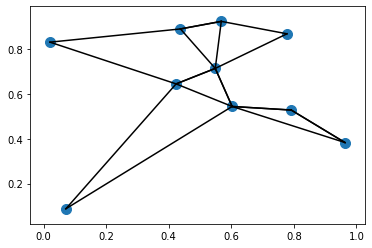

In [16]:
plt.scatter(x[:, 0], x[:, 1], s=100)
K = 2
for i in range(x.shape[0]):
    for j in k_dist_prox[i, :K+1]:
        plt.plot(*zip(x[j], x[i]), color='black')